## Import

In [1]:
import sys
sys.path.append(r'\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\src\facility_location_Bergen\custome_modules')

In [2]:
import pickle as pkl
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import numpy as np
import networkx as nx
# import facility_location
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
def show_graph(F, display_jam=False, free_flow=False, fig=None):
  if type(F) != list:
    F = [F]
  
  colors = ["blue", "red", "green", "yellow", "orange", "purple", "brown"]
  
  if fig is None:
    fig = go.Figure()

  for j, f in enumerate(F):
    if j < len(colors):
      color = colors[j]
    else:
      color = "black"
      
    nodes_lon = []
    nodes_lat = []
    diff_weights = []
    for edge in f.edges(data=True):
          x0, y0 = edge[0]
          x1, y1 = edge[1]
          weight = edge[2]["weight"]
          weight2 = edge[2]["weight2"]
          nodes_lon.append(x0)
          nodes_lon.append(x1)
          nodes_lon.append(None)
          nodes_lat.append(y0)
          nodes_lat.append(y1)
          nodes_lat.append(None)
          diff_weights.append(abs(weight2 - weight) / weight2)
    
    nodes_lon_color = {"green": [], "gold": [], "orange": [], "red": []}
    nodes_lat_color = {"green": [], "gold": [], "orange": [], "red": []}

    
    for i, weight in enumerate(diff_weights):
      mapped_weight = stats.percentileofscore(diff_weights, weight) / 100
      if mapped_weight < 0.25:
        nodes_lon_color["green"] += nodes_lon[i*3:i*3+3]
        nodes_lat_color["green"] += nodes_lat[i*3:i*3+3]
      elif mapped_weight < 0.5:
        nodes_lon_color["gold"] += nodes_lon[i*3:i*3+3]
        nodes_lat_color["gold"] += nodes_lat[i*3:i*3+3]
      elif mapped_weight < 0.75:
        nodes_lon_color["orange"] += nodes_lon[i*3:i*3+3]
        nodes_lat_color["orange"] += nodes_lat[i*3:i*3+3]
      else:
        nodes_lon_color["red"] += nodes_lon[i*3:i*3+3]
        nodes_lat_color["red"] += nodes_lat[i*3:i*3+3]
  
    if display_jam and not free_flow:
      for key in nodes_lon_color.keys():
        fig.add_trace(go.Scattermapbox(
              lat=nodes_lat_color[key],
              lon=nodes_lon_color[key],
              mode='lines',
              line=dict(width=1, color=key),
              showlegend=False,
          ))
    else:
      fig.add_trace(go.Scattermapbox(
          lat=nodes_lat,
          lon=nodes_lon,
          mode='lines',
          line=dict(width=1, color=color),
          showlegend=False,
      ))

      nodes = f.nodes()
      nodes = gpd.GeoDataFrame(pd.Series(list(nodes())).apply(lambda x: Point(x)), columns=["geometry"], crs="EPSG:4326")


      fig.add_trace(go.Scattermapbox(
      lat = nodes.geometry.y,
      lon = nodes.geometry.x,
      mode='markers',
      marker=dict(size=2, color="black"),
      showlegend=False,
    ))
  
  if display_jam:
    style = "carto-positron"
  else:
    style = "open-street-map"
  fig.update_layout(title="<b>Graph visualization<b>",
                        mapbox=dict(
                          style=style,
                          center=dict(lat=np.mean(pd.Series(nodes_lat).dropna()), lon=np.mean(pd.Series(nodes_lon).dropna())),
                          zoom=9
                          ),
                        title_pad_l=260,
                        height=700,
                        width=1000,)

  return  fig

In [4]:
def build_cc(G, strong=False):
    if not strong:
        if nx.is_directed(G):
            G = G.to_undirected()
        CCs = [nx.DiGraph(G.subgraph(c).copy()) for c in sorted(nx.connected_components(G), reverse=True, key=len)]
    else:
        CCs = [G.subgraph(c).copy() for c in sorted(nx.strongly_connected_components(G), reverse=True, key=len)]
    return CCs

In [27]:
root = r"C:\Users\guest801981\Downloads"
with open(root+r"\history_changes_refine.pkl", "rb") as f:
    history = pkl.load(f)
    
# with open(root+r"\graph_refine_all_day.pkl", "rb") as f:
#     G = pkl.load(f)
    
with open(root+r"\graph_final_dict.pkl", "rb") as f:
    G_dict = pkl.load(f)
    
G_dict_2 = {}
root_2 = r"\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\data\03_primary"
file_names = ["all_day", "morning", "midday", "afternoon"]
for file in file_names:
    with open(root_2+r"\average_graph_"+file+"_connected_splitted.pkl", "rb") as f:
        G_dict_2[file] = pkl.load(f)

In [6]:
# for k, v in G_dict.items():
#     with open(root+r"\graph_final_"+k+".pkl", "wb") as f:
#         pkl.dump(v, f)

In [26]:
# with open(root+r"\graph_final_dict.pkl", "wb") as f:
#     pkl.dump(G_dict_2, f)

In [28]:
root_2 = rf"\/Pund\Stab$/guest801981/Documents/GitHub/GeoSpatial-analysis/facility-location-Bergen/data/03_primary"
times = ["all_day", "morning", "midday", "afternoon"]

In [86]:
# print("saving average graphs")
# for time in times:
#     if time != "all_day_free_flow":
#         print(f"average graphs for {time}")
#         path = root + f"/average_graph_{time}_connected_splitted.pkl"
#         with open(path, "wb") as f:
#             pkl.dump(G_dict[time], f)

loading average graphs
average graphs for all_day
average graphs for morning
average graphs for midday
average graphs for afternoon


In [29]:
print("saving average graphs first cc")
for time in times:
    if time != "all_day_free_flow":
        print(f"average graphs for {time}")
        path = root_2 + f"/average_graph_{time}_connected_splitted_firstSCC.pkl"
        CCs = build_cc(G_dict[time], strong=True)
        CC0 = CCs[0]
        with open(path, "wb") as f:
            pkl.dump(CC0, f)

saving average graphs first cc
average graphs for all_day
average graphs for morning
average graphs for midday
average graphs for afternoon


In [76]:
for e_all in G_dict["all_day"].edges(data=True):
    for e_morning in G_dict_2["morning"].edges(data=True):
        if e_all[0] == e_morning[0] and e_all[1] == e_morning[1]:
            if e_all[2]["weight"] == e_morning[2]["weight"]:
                print("all_day","|" " morning")
                print(round(e_all[2]["weight"],4), "  | ", round(e_morning[2]["weight"],4))

all_day | morning
28.44   |  28.44


In [30]:
CCs = {}
for time in times:
    if time != "all_day_free_flow":
        print(f"loading average graphs for {time}")
        path = root_2 + f"/average_graph_{time}_connected_splitted_firstSCC.pkl"
        with open(path, "rb") as f:
            CCs[time] = pkl.load(f)

loading average graphs for all_day
loading average graphs for morning
loading average graphs for midday
loading average graphs for afternoon


In [31]:
G = CCs["all_day"]

In [32]:
bi_edges = []
for edge in G.edges(data=False):
    if (edge[1], edge[0]) in G.edges(data=False) and edge[0] != edge[1] and (edge[1], edge[0]) not in bi_edges:
        bi_edges.append(edge)
len(bi_edges)

0

In [20]:
nx.number_connected_components(G.to_undirected())

1

In [21]:
nx.number_strongly_connected_components(G)

1

In [33]:
show_graph(G)

In [35]:
list(G.nodes())[0]

(5.51596, 60.42212)

In [24]:
G.edges((5.33993, 60.37352))

OutEdgeDataView([((5.33993, 60.37352), (5.34004, 60.37404)), ((5.33993, 60.37352), (5.33981, 60.37294))])

## Solution analysis

In [3]:
root = r"\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\facility-location-Bergen\data\07_model_output\1_locations\deterministic_exact_solutions"
times = ["all_day_free_flow", "all_day", "morning", "midday", "afternoon"]

In [4]:
exact_solution = {}
for time in times:
    print(f"average graphs for {time}")
    path = root + f"\\light_exact_solution_{time}.pkl"
    with open(path, "rb") as f:
        exact_solution[time] = pkl.load(f)

average graphs for all_day_free_flow
[    0.00] Initializing mpi-sppy
average graphs for all_day
average graphs for morning
average graphs for midday
average graphs for afternoon


In [9]:
exact_solution["all_day_free_flow"].__dict__.keys()

dict_keys(['coordinates', 'candidate_coordinates', 'n_of_locations_to_choose', 'adjacency_matrix_weight', 'n_of_demand_points', 'result', 'solution_value', 'locations_index', 'locations_coordinates', 'solver_status', 'computation_time', 'algorithm'])

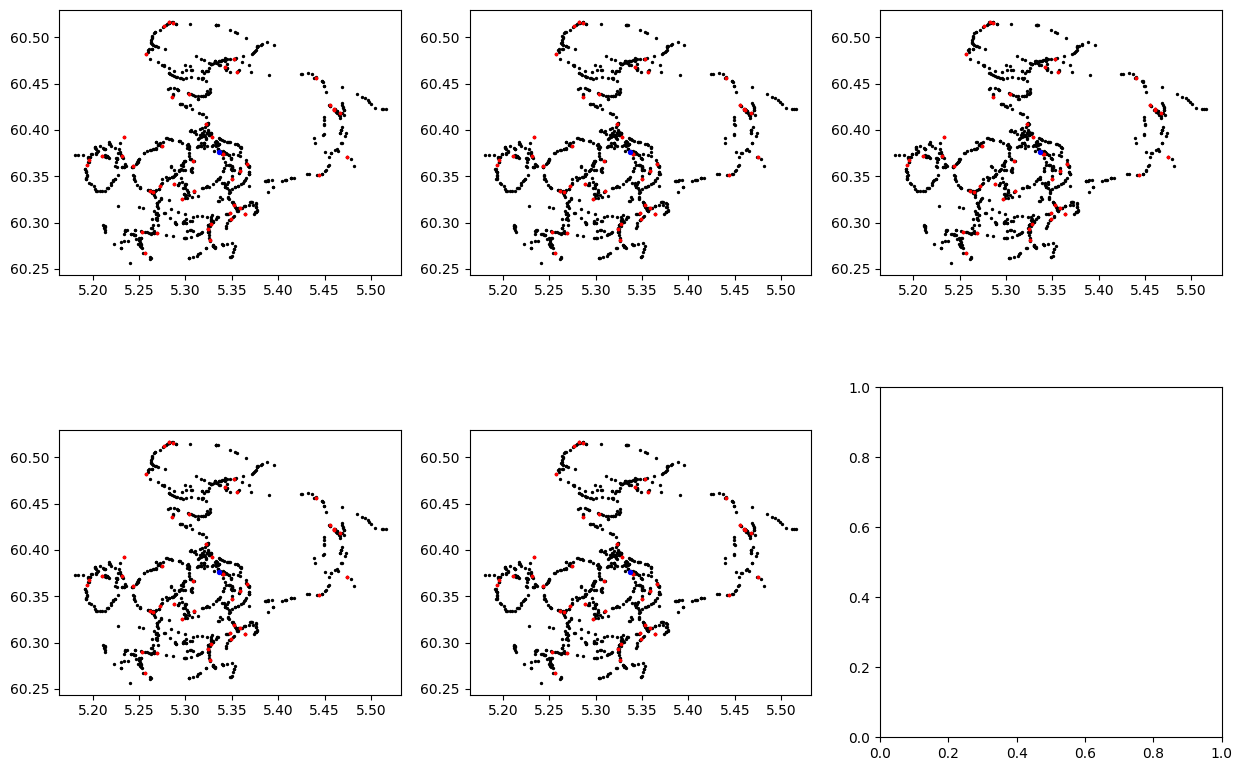

In [5]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        if i*3+j < len(times):
            coord = exact_solution[times[i*3+j]].coordinates
            candidate_coord = exact_solution[times[i*3+j]].candidate_coordinates
            sol_loc = exact_solution[times[i*3+j]].locations_coordinates[0]
            coord.plot(ax=ax, color="black", markersize=2)
            candidate_coord.plot(ax=ax, color="red", markersize=3)
            ax.scatter(sol_loc.iloc[0].x, sol_loc.iloc[0].y, color="blue", s=8)

In [7]:
exact_solution["all_day_free_flow"].locations_coordinates

[geometry    POINT (5.33642 60.37613)
 Name: 1742, dtype: geometry]

In [18]:
for time, solution in exact_solution.items():
    print(time, "\n", solution.solution_value/60)

all_day_free_flow 
 27.73801436883538
all_day 
 28.63100291916465
morning 
 27.916718055829065
midday 
 28.288487305963404
afternoon 
 29.74540400909803


## Traffic JAM

In [ ]:
fig = show_graph(G_dict_2["morning"], display_jam=True, free_flow=False)
fig

In [ ]:
fig = show_graph(G_dict_2["morning"])
fig

## Pipeline run

In [1]:
from kedro.runner.sequential_runner import SequentialRunner
from kedro.io import DataCatalog
from kedro.framework.startup import bootstrap_project
from kedro.framework.project import find_pipelines
from kedro_datasets.yaml import YAMLDataSet
import yaml

In [2]:
project_path = r"\/Pund/Stab$/guest801981/Documents/GitHub/GeoSpatial-analysis/facility-location-Bergen"
metadata = bootstrap_project(project_path)

In [3]:
runner = SequentialRunner()

In [4]:
pipelines = find_pipelines()

[    0.00] Initializing mpi-sppy


[09/15/23 16:47:26] WARNING  \\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_en warnings.py:109
                             v\lib\site-packages\kedro\framework\project\__init__.py:281:                          
                             UserWarning: The 'facility_location_Bergen.pipelines.fl_stochastic'                   
                             module does not expose a 'create_pipeline' function, so no pipelines                  
                             defined therein will be returned by 'find_pipelines'.                                 
                               warnings.warn(                                                                      
                                                                                                                   

[09/15/23 16:47:27] WARNING  \\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_en warnings.py:109
                             v\lib\site-packages\kedro\framework\project\__init__.py:359:                          
                             UserWarning: An error occurred while importing the                                    
                             'facility_location_Bergen.pipelines.visualization' module. Nothing                    
                             defined therein will be returned by 'find_pipelines'.                                 
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File                                                                                
                             "\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_e                
                             nv\lib\site-packages\kedro\framework\project\__init__.py", line 357,                  
                             in find_pipelines                                                                     
                                 pipeline_module = importlib.import_module(pipeline_module_name)                   
                               File "C:\Program                                                                    
                             Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64                
                             __qbz5n2kfra8p0\lib\importlib\__init__.py", line 126, in import_module                
                                 return _bootstrap._gcd_import(name[level:], package, level)                       
                               File "<frozen importlib._bootstrap>", line 1050, in _gcd_import                     
                               File "<frozen importlib._bootstrap>", line 1027, in _find_and_load                  
                               File "<frozen importlib._bootstrap>", line 1006, in                                 
                             _find_and_load_unlocked                                                               
                               File "<frozen importlib._bootstrap>", line 688, in _load_unlocked                   
                               File "<frozen importlib._bootstrap_external>", line 883, in                         
                             exec_module                                                                           
                               File "<frozen importlib._bootstrap>", line 241, in                                  
                             _call_with_frames_removed                                                             
                               File                                                                                
                             "\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\facilit                
                             y-location-Bergen\src\facility_location_Bergen\pipelines\visualization                
                             \__init__.py", line 6, in <module>                                                    
                                 from .pipeline import create_pipeline                                             
                               File                                                                                
                             "\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\facilit                
                             y-location-Bergen\src\facility_location_Bergen\pipelines\visualization                
                             \pipeline.py", line 13, in <module>                                                   
                                 from .nodes import *   

In [11]:
pipeline_to_run = "solution_comparison"
namespace_to_run = "01"

In [12]:
pipeline_data_catalog_path = project_path + f"/conf/base/parameters/{pipeline_to_run}.yml"
with open(pipeline_data_catalog_path, "r") as f:
    params = yaml.safe_load(f)

In [13]:
data_params_path = project_path + f"/conf/base/parameters/{pipeline_to_run}_TEMP.yml"
params_data_set = YAMLDataSet(filepath=data_params_path)
params_data_set.save(params[pipeline_to_run+namespace_to_run])

In [16]:
data_catalog = DataCatalog(data_sets={f"params:{pipeline_to_run}{namespace_to_run}": params_data_set})

In [17]:
runner.run(pipelines["solution_comparison"].only_nodes_with_namespace(f"{pipeline_to_run}.{namespace_to_run}"), data_catalog)

[09/15/23 16:51:36] INFO     Loading data from 'params:solution_comparison01' (YAMLDataSet)...  ]8;id=743554;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=540691;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\

                    INFO     Running node: verify_df_already_created([params:solution_comparison01]) -> ]8;id=558438;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=727100;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py#331\331]8;;\
                             [solution_comparison.01.is_created]                                                   

                    INFO     Saving data to 'solution_comparison.01.is_created'                 ]8;id=205958;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=851732;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#531\531]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Completed 1 out of 3 tasks                                     ]8;id=236216;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=700700;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py#85\85]8;;\

                    INFO     Loading data from 'params:solution_comparison01' (YAMLDataSet)...  ]8;id=614399;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=131175;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\

                    INFO     Loading data from 'solution_comparison.01.is_created'              ]8;id=829010;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=997823;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Running node: solution_vs_scenario:                                        ]8;id=827774;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=342450;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py#331\331]8;;\
                             solution_vs_scenario([params:solution_comparison01,solution_comparison.01.            
                             is_created]) -> [solution_comparison.01.pickle_file]                                  

[09/15/23 16:51:36] INFO     Loading exact solution for all_day_free_flow
                    INFO     Loading adj matrix for all_day
[09/15/23 16:51:37] INFO     Compute the distance from the all_day_free_flow solution to all the other nodes in the all_day graph
                    INFO     0 out of 9850
                    INFO     500 out of 9850
                    INFO     1000 out of 9850
                    INFO     1500 out of 9850
                    INFO     2000 out of 9850
                    INFO     2500 out of 9850
                    INFO     3000 out of 9850
                    INFO     3500 out of 9850
                    INFO     4000 out of 9850
                    INFO     4500 out of 9850
                    INFO     5000 out of 9850
                    INFO     5500 out of 9850
                    INFO     6000 out of 9850
                    INFO     6500 out of 9850
                    INFO     7000 out of 9850
                    INFO     7500 out of 9850
    

[09/15/23 16:56:25] INFO     Saving data to 'solution_comparison.01.pickle_file'                ]8;id=323919;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=274913;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#531\531]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Completed 2 out of 3 tasks                                     ]8;id=320155;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=869073;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py#85\85]8;;\

                    INFO     Loading data from 'solution_comparison.01.pickle_file'             ]8;id=964284;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=234565;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Running node: update_data_catalog:                                         ]8;id=570950;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py\node.py]8;;\:]8;id=816062;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\pipeline\node.py#331\331]8;;\
                             update_data_catalog_gdf([solution_comparison.01.pickle_file]) ->                      
                             [solution_comparison.01.finished]                                                     

                    INFO     Saving data to 'solution_comparison.01.finished'                   ]8;id=782433;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=315651;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#531\531]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Completed 3 out of 3 tasks                                     ]8;id=443020;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py\sequential_runner.py]8;;\:]8;id=547399;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\sequential_runner.py#85\85]8;;\

                    INFO     Pipeline execution completed successfully.                               ]8;id=47477;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\runner.py\runner.py]8;;\:]8;id=922294;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\runner\runner.py#105\105]8;;\

                    INFO     Loading data from 'solution_comparison.01.finished'                ]8;id=246070;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=182674;file://\\Pund\Stab$\guest801981\Documents\GitHub\GeoSpatial-analysis\kedro_env\lib\site-packages\kedro\io\data_catalog.py#492\492]8;;\
                             (MemoryDataset)...                                                                    

{'solution_comparison.01.finished': True}